In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt 

data = genfromtxt('data.csv', delimiter=',')
areas = data[:, 0:1]

# vector [b, x]
N = data.shape[0]
x_data = np.hstack([np.ones((N, 1)), areas])
y_data = data[:, 1]

print('x_data: \n', x_data)
print(y_data)

x_data: 
 [[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
[9.1 5.9 4.6 6.7]


In [2]:
# params
lr = 0.005
epoch_max = 30
losses = [] # monitoring

theta = np.array([0.04, -0.34]) #[b, w]
print('theta: \n', theta)

theta: 
 [ 0.04 -0.34]


In [3]:
# shuffle data
def shuffle_data(X, y):
    indices = np.random.permutation(N)
    x_data_sh = x_data[indices]
    y_data_sh = y_data[indices]

    return x_data_sh, y_data_sh

# forward
def predict(X, theta):
    return np.dot(X.T, theta)

#gradient
def gradient(y_hat, y, X):
    dtheta = 2*X*(y_hat-y)

    return dtheta

# update weights
def update_weight(theta, lr, dtheta):
    dtheta_new = theta - lr*dtheta

    return dtheta_new

In [4]:
for epoch in range(epoch_max):
    # shuffle
    x_data_sh, y_data_sh = shuffle_data(x_data, y_data)

    for i in range(N):
        # get a sample
        x = x_data_sh[i,:]
        y = y_data_sh[i:i+1]

        # predict y_hat
        y_hat = predict(x, theta)

        # compute loss
        loss = (y-y_hat)*(y-y_hat)
        losses.append(loss.item())

        # compute gradient
        dtheta = gradient(y_hat, y, x)

        # update weight
        theta = update_weight(theta, lr, dtheta)

print('theta: \n', theta)

theta: 
 [0.27257903 1.24480233]


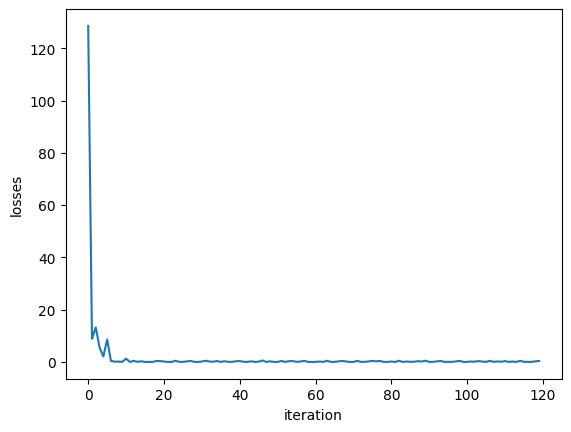

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

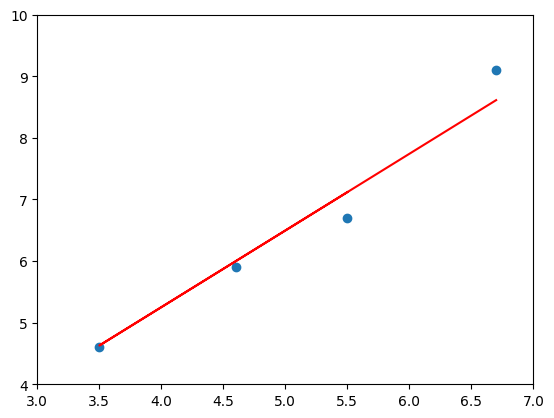

In [6]:
y_prediction = [x*theta[1] + theta[0] for x in areas]
plt.plot(areas, y_prediction, 'r')
#----------------------------------------------
plt.scatter(areas, y_data)
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()